
# More details on commonly used functions




## odeint



Details of how to implement this function can be found here:
[scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

This function solves a system of ordinary differential equations.

A brief review of solving ODEs the old-fashioned way. ODEs are functions of a single independent variable and derivatives of the dependent variable.

\begin{equation}
F(x,y,y',y',...y^{(n-1)}) = y^n
\end{equation}

Solving simple versions of these equations requires taking the integral of the function.

For example, how would you solve the following equation: $\frac{dx}{dt} = cos(t)$?

If the derivative of $x$ is $cos(t)$, then $x(t) = sin(t) + c$, where $c$ is some arbitrary integration constant.

We can not solve for $c$ without additional information about. This is where the initial condition comes in. For simplicity, lets say $x(0) = 0$. So the solution should be $x(t) = sin(t)$, where $c$. Defining the initial condition in 

Lets test and see if we've solved the equation appropriately. Below is 



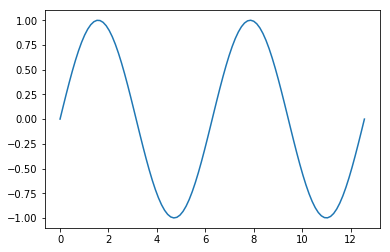

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

tspan = np.linspace(0,4*np.pi,num=100)
x0 = 0 # Specify that x(0) = 0

plt.plot(tspan,np.sin(tspan)) # Plots the solution determined analytically above.



# Write your ordinary differential equation here and plot it with the analytical solution.


plt.show()

Do the plots match?

What would change if we'd specified a different initial condition?

OK, that's all well and good, but unless you tell the computer how to integrate every type of function, it wont know the analytical solution from a hole in the wall. Also, not all ODEs can be solved analytically.

So, how does the computer solve the problem numerically? Lets start with the basics of numerical methods. Imagine a line tangent to the curve of a function.



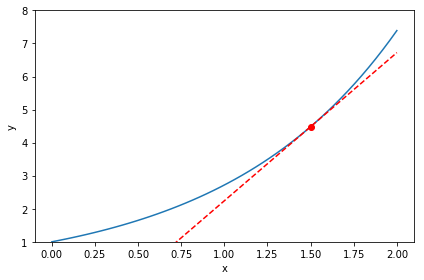

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):         # Our function will be y = exp(x)
    return np.exp(x)

def tangent(x,a):    # The tangent of a function at a point 'a' is defined y'(a) * (x-a) + y(a)
    return func(a)*(x-a) + func(a)

# Try playing with these values
x = np.linspace(0,2)
a = 1.5

plt.plot(x,func(x))
plt.plot(a,func(a),'ro')
plt.plot(x,tangent(x,a),'r--')
plt.ylim(1,8)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('images/tangent.png')
#plt.show()

![img](images/tangent.png)

In this case, the solution to the actual function is reasonably close to the line tangent to the curve. Let's call this reasonable distance $h$. Then we can then we can simply calculate the next point in the function as the rise over the run:

\begin{equation}
\Delta y_{x \rightarrow h} = \frac{y(x+h) - y(x)}{h} \approx y'(x)
\end{equation}

Lets see how reasonable this approximation is.



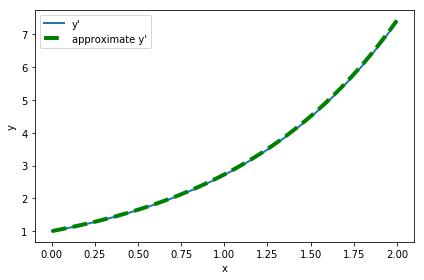

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.exp(x)

def func_prime(x,h): # This is our approximation of the derivative
    return (func(x+h) - func(x)) / h

# Go ahead and play with these parameters
x = np.linspace(0,2)
h = 0.01

plt.plot(x,np.exp(x),lw=2,label= "y'")
plt.plot(x,func_prime(x,h),'g--',lw=4,label="approximate y'")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('images/tangent2.png')
#plt.show()

![img](images/tangent2.png)

This seems to be a reasonable basic approximation for the derivative of a function. You can see how the approximation improves as the step size $h$ is reduced.

Suppose now that we write the ODE as $y'(x) = f(x,y(x))$. When we are solving our reactor problems, $f(x,y(x))$ is defined in the problem statement.

If we substitute this into our step-wise approximation of the derivative as defined above, we can rewrite the dependent variable as:

\begin{equation}
y(x+h) \approx y(x) + h f(x,y(x))
\end{equation}

Now, all we need to predict some $y(x+h)$ value is $y(x)$ itself. But that's what we're trying to solve for! Are we stuck?

Not quite. Here is where we incorporate the initial condition. From the problem statement, we must know $y(x_0) = y_0$. Now we have a place to start!



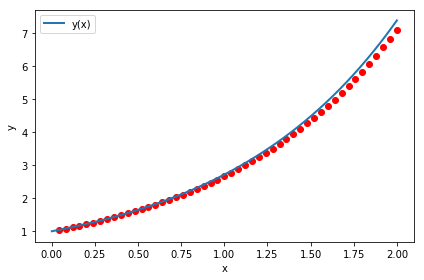

In [13]:
import numpy as np
import matplotlib.pyplot as plt

max_h = 2.0
xspan = np.linspace(0,max_h)

# Our ordinary differential equation is dy/dx = y
# Lets assume y_0 = 1 when x_0 = 0.
h = max_h / len(xspan)
y = 1   # y0
x = 0   # x0

for i,xsp in enumerate(xspan):
    y = y + h*y
    x = x + h
    plt.plot(x,y,'ro')

plt.plot(xspan,np.exp(xspan),lw=2,label= "y(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('images/tangent3.png')
#plt.show()

![img](images/tangent3.png)

This is known as the Euler method.

The odeint function works in a similar fashion. It begins by solving the equation using the initial guess provided. From there, it numerically calculates the values requested in the third argument by calculating along the length of the function in small steps.

odeint uses a much more sophisticated approach than the Eular method, but the concept remains the same.

<span class="underline">Concept questions:</span>
What are some possible limitations to using numerical methods to solve ODEs?

<span class="underline">Partice problem:</span>
Calculate $y(x)$ for $y'(x) = x*sin(x^2)$, and $y(x_0 = 0) = 1$




## odelay



[pycse.odelay](https://www.google.com/#safe=off&q=pycse.odelay)

odelay is a function created by John Kitchin which utilizes all of the same functionality as odeint. They operate exactly the same way, except odelay has an additional feature built in. This is the ability to identify and return all of the locations the event is equal to zero.

As discussed above, numerical ODE solvers move in small step sizes from the initial condition through the desired range of the independent variable. As the odelay function progresses through these steps, it records the value of the calculated dependent variable $y(x)$ along the way for each value of $x$. 

Here is an example of the function taken from the class notes.



In [5]:
import numpy as np
from pycse import odelay
import matplotlib.pyplot as plt

def dydx(y, x):
    '$\frac{dy}{dx} = y$'
    return y

def event(y, x):
    'event for y=6'
    value = y - 6  # zero at the y-value we want
    isterminal = True
    direction = 0       # all zeros
    return value, isterminal, direction

xspan = np.linspace(0, 2)
y0 = 1

x, y, te, ye, ie =  odelay(dydx, y0, xspan, [event])
print(te[0], ye[0])

1.79175956351 [ 6.]


"value" - Allows us to find points in the function which are not at zero. Instead, we provide some offset, which allows us to maintain the true form of the equation.

"isterminal" - Since the iterative process described above can be time consuming when performed over long intervals, sometimes it is preferred to stop a calculation as soon as the desired point has been reached. This can be done by setting isterminal equal to True.

"direction" - odelay records all solved values of the dependent variable, and knows when it has obtained one coming from a positive or negative change in the slope. By setting direction equal to 1, it will only record events when the value of the dependent variable is increasing. The opposite is true if direction is set equal to -1. All events are recorded if direction id equal to 0.

A more detailed explanation about how the function was created can be found here: [http://kitchingroup.cheme.cmu.edu/blog/2013/01/28/Mimicking-ode-events-in-python/](http://kitchingroup.cheme.cmu.edu/blog/2013/01/28/Mimicking-ode-events-in-python/)

<span class="underline">Concept question:</span>
How could your initial guess affect the outcome of an odelay calculation if direction were not equal to zero?




## fsolve



[scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

fsolve is used to find the roots of a known function.

When using fsolve, the objectives and starting information are quite different than for an ODE problem. To use fsolve, we must know the form of the function already.

Here is an example from class.



In [6]:
import numpy as np
from scipy.optimize import fsolve

Ca0 = 1.5  # mol / L
v0 = 0.15  # L/min
V = 5      # L

Fa0 = Ca0 * v0  # molar flow of A into reactor

def objective(Ca):
    Fa = Ca * v0
    ra = -1.75 * Ca / (1 + 10 * Ca)**2
    return Fa0 - Fa + ra * V

print('steady state 1 = {0}'.format(fsolve(objective, 0.05)))
print('steady state 2 = {}'.format(fsolve(objective, 0.19)))
print('steady state 3 = {}'.format(fsolve(objective, 1.0)))

steady state 1 = [ 0.0740589]
steady state 2 = [ 0.19680782]
steady state 3 = [ 1.02913327]


In this example, it is important to note that John needed to specify an initial guess close to each root. 

A more detailed description of how one might iteratively solve for the root of a function can be found here: [http://en.wikipedia.org/wiki/Newton's_method](http://en.wikipedia.org/wiki/Newton's_method)

<span class="underline">Concept question:</span>
It which cases would the Newton method be most likely to fail? 
Which types of functions would you expect to be difficult to find roots of?




# Review of previous class: transient-cstr-mss



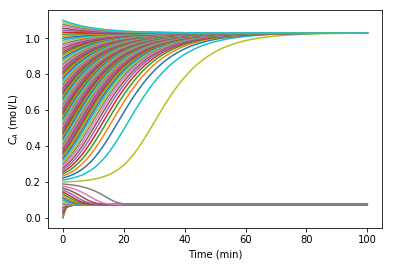

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Ca0 = 1.5  # mol / L
v0 = 0.15  # L/min
V = 5.0    # L

Fa0 = Ca0 * v0

def dCadt(Ca, t):
    Fa = Ca * v0
    ra = -1.75 * Ca / (1 + 10 * Ca)**2
    return Fa0 - Fa + ra * V

tspan = np.linspace(0.0, 100.0, 100)
Ca_init = np.linspace(0,1.1, 100) # initial condition in the tank

for C in Ca_init:
    sol = odeint(dCadt, C, tspan)

    plt.plot(tspan, sol)

plt.xlabel('Time (min)')
plt.ylabel('$C_A$ (mol/L)')
plt.show()